In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Question 1

In [2]:
jan_df = pd.read_parquet("https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet")
feb_df = pd.read_parquet("https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet")

In [3]:
jan_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,NaN,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,NaN,B00037


In [4]:
feb_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,NaN,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,NaN,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,NaN,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,NaN,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,NaN,B00037


In [5]:
print(f"Number of records in January dataset is {len(jan_df)}")

Number of records in January dataset is 1154112


### Question 2

In [6]:
jan_df["duration"] = jan_df["dropOff_datetime"] - jan_df["pickup_datetime"]
jan_df["duration"] = jan_df["duration"].dt.total_seconds()/60


print(f"Average trip (in minutes) for January dataset is {jan_df['duration'].mean()}")

Average trip (in minutes) for January dataset is 19.167224093791006


### Data Preparation

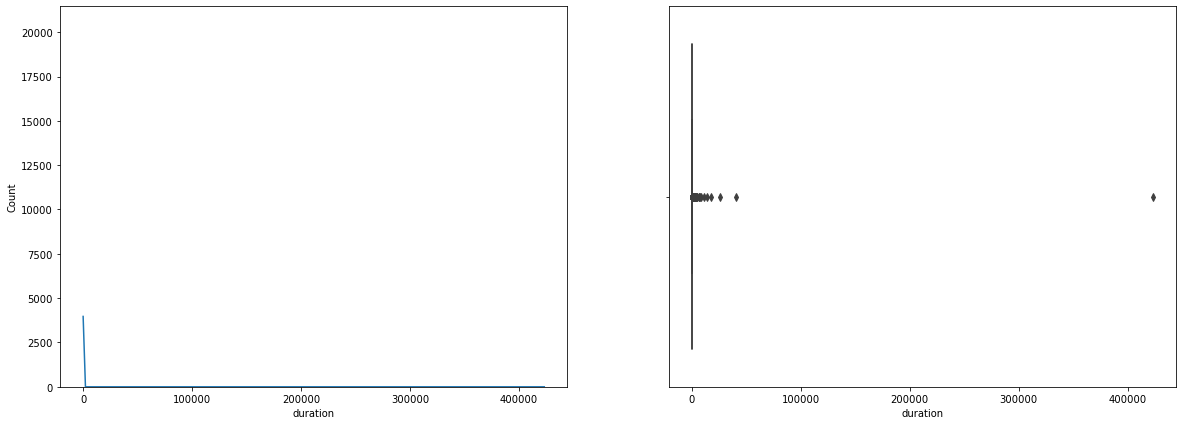

In [15]:
# fig,ax = plt.subplots(figsize = (20,7), ncols=2)

# sns.histplot(x="duration",data=jan_df,kde=True,ax=ax[0]);
# sns.boxplot(x="duration",data=jan_df,ax=ax[1]);

In [19]:
condition = (jan_df["duration"] >= 1) & (jan_df["duration"] <= 60)
new_jan_df = jan_df[condition].reset_index(drop=True)

print(f"Number of records dropped is {len(jan_df)-len(new_jan_df)}")

Number of records dropped is 44286


### Question 3

In [26]:
new_jan_df = new_jan_df[["PUlocationID","DOlocationID","duration"]]

print(f"Percent of Pickup Location empty is {(new_jan_df.PUlocationID.isna().sum()/len(new_jan_df.PUlocationID)*100)}")

new_jan_df.fillna(-1,inplace=True)

Percent of Pickup Location empty is 83.52732770722618


### Question 4

In [32]:
new_jan_df.PUlocationID = new_jan_df.PUlocationID.astype("str")
new_jan_df.DOlocationID = new_jan_df.DOlocationID.astype("str")

new_jan_df.dtypes

PUlocationID     object
DOlocationID     object
duration        float64
dtype: object

In [35]:
new_jan_df.head()

,PUlocationID,DOlocationID,duration
0,-1.0,-1.0,17.000000
1,-1.0,-1.0,17.000000
2,-1.0,72.0,8.283333
3,-1.0,61.0,15.216667
4,-1.0,71.0,9.050000


In [39]:
dict_vectorizer = DictVectorizer()

jan_dict = new_jan_df.drop("duration",1).to_dict(orient="records")
X_train = dict_vectorizer.fit_transform(jan_dict)
y_train = new_jan_df["duration"]

print(f"Dimensionality of the matrix is {X_train.shape[1]}")

Dimensionality of the matrix is 525


### Question 5

In [40]:
model = LinearRegression()
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
print(f"RMSE score on train dataset is {mean_squared_error(y_train,train_preds,squared=False)}")

RMSE score on train dataset is 10.528519433270043


### Question 6

In [43]:
feb_df["duration"] = feb_df["dropOff_datetime"] - feb_df["pickup_datetime"]
feb_df["duration"] = feb_df["duration"].dt.total_seconds()/60

condition = (feb_df["duration"] >= 1) & (feb_df["duration"] <= 60)
new_feb_df = feb_df[condition].reset_index(drop=True)

new_feb_df = new_feb_df[["PUlocationID","DOlocationID","duration"]]
new_feb_df.fillna(-1,inplace=True)

new_feb_df.PUlocationID = new_feb_df.PUlocationID.astype("str")
new_feb_df.DOlocationID = new_feb_df.DOlocationID.astype("str")

feb_dict = new_feb_df.drop("duration",1).to_dict(orient="records")
X_test = dict_vectorizer.transform(feb_dict)
y_test = new_feb_df["duration"]

test_preds = model.predict(X_test)
print(f"RMSE score on test dataset is {mean_squared_error(y_test,test_preds,squared=False)}")

RMSE score on test dataset is 11.01428568518046
